# ShowerPy Demo 
This notebook illustrates some of the functionality of the ShowerPy package 

# 1. Simulating showers

To simulate showers, we can use the `CorsikaRunner` class 

In [72]:
from astropy import units as u
from CorsikaRunner import CorsikaRunner
import os

# This is the path to your compiled CORSIKA binary 
path_corsika_executable = '/home/jschaefer/Software/corsika-78000/run/corsika78000Linux_QGSIII_urqmd'

# We now open the runner
CR = CorsikaRunner(
    path_corsika_executable = path_corsika_executable
)

# And configure a run, we want to simulate 
CR.configure_run(
    primary_particle = 'gamma', 
    primary_energy = 50 * u.GeV,
    observation_level= 0 * u.km,
    zenith_angle = 0 * u.deg,
    azimuth_angle = 0 * u.deg,
    random_seeds = True,
    ext_atmosphere= None, # External atmospheric profile (proprietary)
    path_output = os.path.join(os.getcwd(), '50GeV_gamma_0deg_zenith')
)

# Let us have a look at the current config 
CR.current_config


{'run_number': 1,
 'primary_particle': 1,
 'primary_energy': <Quantity 50. GeV>,
 'observation_level': <Quantity 0. cm>,
 'zenith_angle': <Quantity 0. deg>,
 'azimuth_angle': <Quantity 0. deg>,
 'seeds': 'SEED    886866926    441    0     seed for random number sequence 1\nSEED    949775822    150    0     seed for random number sequence 2\nSEED    644327509    940    0     seed for random number sequence 3\nSEED    613546632    593    0     seed for random number sequence 4',
 'path_output': '/home/jschaefer/Software/showerpy/showerpy/50GeV_gamma_0deg_zenith',
 'ext_atmosphere': '*'}

Now that we have the config, we can start the simulation using the `CR.run_simulation()` call. Depending on your selections this may take anywhere from 20 seconds to a few minutes. 

In [73]:
CR.run_simulation()

Starting CORSIKA simulation (this may take a few minutes)...


Outside grid limits: ix=0, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=1, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=2, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=3, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=4, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=5, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=6, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=7, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=8, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=9, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=10, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=11, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=12, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=13, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=14, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=15, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=16, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=17, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=18, iy=1100, n

Simulation has completed
	-> Copying files to user directory
	-> Cleanup temporary working directory


# 2. Plotting showers

In order to plot showers, we will use the `CorsikaPlotter` Class. At first, we need to tell the plotter, where our files are located (this directory). Afterwards, `CorsikaPlotter` will parse all the data into pandas dataframes

In [41]:
from CorsikaPlotter import CorsikaPlotter

# Use this if you just simulated a shower
# path_data = CR.current_config['path_output']

# Or point directly to the simulated data
path_data = '50GeV_gamma_0deg_zenith'

CP = CorsikaPlotter(path_data)


Looking for available files:
	 -> em_data        : Found sim_DAT000001.track_em
	 -> muon_data      : Found sim_DAT000001.track_mu
	 -> hadron_data    : Found sim_DAT000001.track_hd
	 -> cherenkov_data : Found sim_cherenkov_iact

Parsing Cherenkov photon data
	-> Gamma with 50.0 GeV energy
	-> Arriving from from zenith=0.0°,azimuth=0.0°
	-> First interaction height: 37.9 km
	-> Observation level: 0.0 km

Parsing particle track data
	-> Reading sim_DAT000001.track_em
	-> Reading sim_DAT000001.track_mu
	-> Reading sim_DAT000001.track_hd

Correcting Cherenkov coordinate system
	-> Primary trajectory: Start=(   0.0,    0.0,  112.8) km
	                       End  =(   0.0,    0.0,   40.0) km
	-> Shower axis impact point: x=0.00 km, y=0.00 km
	-> Shifting Cherenkov photon coordinates


We can now look at the cherenkov and particle track data in pandas data frame format if that is required. 

In [14]:
# The Cherenkov photons are stored in the ground plane  with x/y coordinates. 
CP.cherenkov_photons

,x_impact_cm,y_impact_cm,cos_incident_x,cos_incident_y,time_since_first_interaction_ns,emission_height_asl_cm,photons,wavelength_nm
0,8417.966797,1808.837280,0.004307,0.000925,-16674.587891,2.454686e+06,3.757001,1152.091309
1,-6610.142578,-9540.797852,-0.003382,-0.004881,-16674.072266,2.454642e+06,6.898604,111.044006
2,-504.776001,8604.482422,-0.000258,0.004402,-16674.587891,2.454597e+06,3.757024,1178.759277
3,6595.798340,6327.853027,0.003375,0.003237,-16674.507812,2.454552e+06,4.225378,236.363708
4,-6887.223633,-5341.347656,-0.003524,-0.002733,-16674.572266,2.454508e+06,3.894858,379.551758
...,...,...,...,...,...,...,...,...
3916745,18209.482422,6947.724121,0.013708,0.063802,-16642.101562,5.480782e+05,1.472431,113.274986
3916746,18486.648438,7040.402344,0.019471,0.065721,-16641.744141,5.479968e+05,6.752558,100.015511
3916747,17514.169922,8288.667969,-0.000767,0.091562,-16638.769531,5.478812e+05,0.632357,113.796104
3916748,18996.816406,7915.090332,0.030228,0.083761,-16639.121094,5.476016e+05,3.710920,105.228714


In [15]:
# The particles are stored as tracks, providng x,y,z start and stop values for each tracking step. the type of particle is encoded in the particle ID. 
CP.particle_tracks

,particle_id,energy_gev,x_start,y_start,z_start,t_start,x_end,y_end,z_end,t_end
0,1.0,50.000004,0.000000,0.000000,1.128292e+07,0.000000,0.000000,0.000000,4.000000e+06,0.000243
1,1.0,50.000004,0.000000,0.000000,4.000000e+06,0.000243,0.000000,0.000000,2.454728e+06,0.000294
2,3.0,9.832801,0.000000,0.000000,2.454728e+06,0.000294,0.090048,0.195955,2.442150e+06,0.000295
3,3.0,9.831460,0.090048,0.195955,2.442150e+06,0.000295,0.991556,0.340788,2.431766e+06,0.000295
4,3.0,2.119975,0.991556,0.340788,2.431766e+06,0.000295,1.722156,4.073472,2.419630e+06,0.000296
...,...,...,...,...,...,...,...,...,...,...
51096,3.0,0.021861,17548.062500,3868.648926,5.481625e+05,0.000358,17551.033203,3884.504150,5.478976e+05,0.000358
51097,3.0,0.021474,17551.033203,3884.504150,5.478976e+05,0.000358,17551.310547,3908.937256,5.476382e+05,0.000358
51098,3.0,0.021094,17551.310547,3908.937256,5.476382e+05,0.000358,17557.455078,3930.504395,5.473832e+05,0.000358
51099,3.0,0.020721,17557.455078,3930.504395,5.473832e+05,0.000358,17555.792969,3946.972656,5.471322e+05,0.000358


In [16]:
# The meaning of the particle id can be accessed from the particle map (dictionary) stored in the CorsikaRunner
CP.particle_map

{'gamma': 1,
 'electron': 2,
 'positron': 3,
 'muon': 5,
 'antimuon': 6,
 'proton': 14,
 'helium': 402,
 'lithium': 703,
 'beryllium': 904,
 'boron': 1105,
 'carbon': 1206,
 'nitrogen': 1407,
 'oxygen': 1608,
 'fluorine': 1909,
 'neon': 2010,
 'sodium': 2311,
 'magnesium': 2412,
 'aluminium': 2713,
 'silicon': 2814,
 'phosphorus': 3115,
 'sulfur': 3216,
 'chlorine': 3517,
 'argon': 3618,
 'potassium': 3919,
 'calcium': 4020,
 'scandium': 4321,
 'titanium': 4422,
 'vanadium': 4723,
 'chromium': 4824,
 'manganese': 5125,
 'iron': 5626}

In [74]:
from CorsikaPlotter import CorsikaPlotter

# Use this if you just simulated a shower
# path_data = CR.current_config['path_output']

# Or point directly to the simulated data
path_data = '50GeV_gamma_0deg_zenith'

CP = CorsikaPlotter(path_data)


Looking for available files:
	 -> em_data        : Found sim_DAT000001.track_em
	 -> muon_data      : Found sim_DAT000001.track_mu
	 -> hadron_data    : Found sim_DAT000001.track_hd
	 -> cherenkov_data : Found sim_cherenkov_iact

Parsing Cherenkov photon data
	-> Gamma with 50.0 GeV energy
	-> Arriving from from zenith=0.0°,azimuth=0.0°
	-> First interaction height: 24.0 km
	-> Observation level: 0.0 km

Parsing particle track data
	-> Reading sim_DAT000001.track_em
	-> Reading sim_DAT000001.track_mu
	-> Reading sim_DAT000001.track_hd

Correcting Cherenkov coordinate system
	-> Primary trajectory: Start=(   0.0,    0.0,  112.8) km
	                       End  =(   0.0,    0.0,   40.0) km
	-> Shower axis impact point: x=0.00 km, y=0.00 km
	-> Shifting Cherenkov photon coordinates


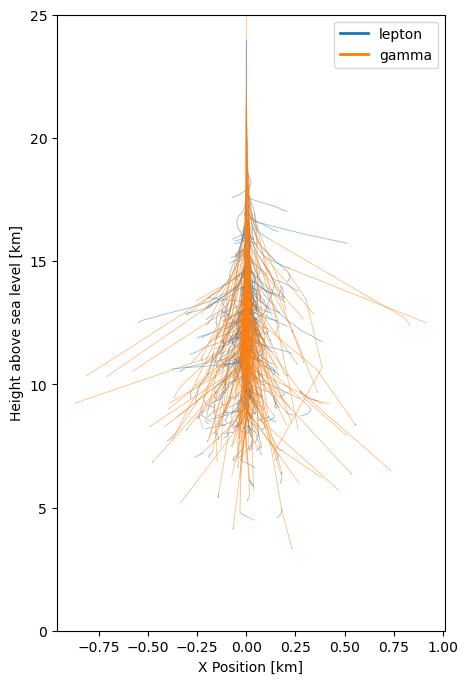

In [75]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax0 = plt.subplots(1, 1, figsize=(5, 8))

#  We can also define a color dict to specify the plot color for different particles
color_dict = {
#  "hadron":'tab:red', 
 'lepton':'tab:blue',
# 'muon + antimuon': 'tab:green',
'gamma': 'tab:orange'
}


# Now we plot the side profile
ax0 = CP.plot_side_profile(ax = ax0,
                           alpha=0.6, # Opacity of a single track
                           color_dict = color_dict,
)
plt.xlabel('X Position [km]')
plt.ylabel('Height above sea level [km]')
plt.show()
plt.close()


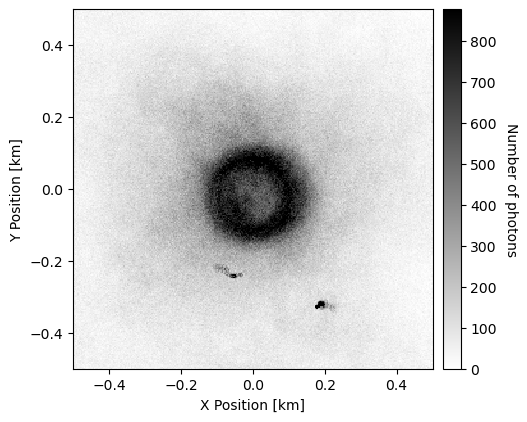

In [80]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax1 = plt.subplots(1, 1, figsize=(5, 8))

ax1 = CP.plot_cher_distribution(
    ax = ax1,
    # use_log=True,
    auto_center=True,
    # show_colorbar=False,
    # cmap='hsv',
    # cmap='viridis',
    # vmin = 1,
    # vmax = 1000,
    nbins = 2000 
)

ax1.set_xlim(-0.5,0.5)
ax1.set_ylim(-0.5,0.5)
plt.show()
plt.close()


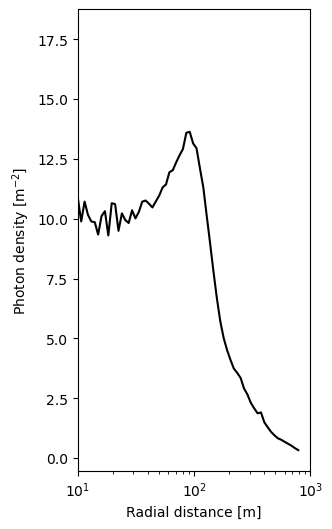

In [81]:
# We can also plot the cherenkov photon density on ground vs. radial distance 
# Note: The current implementation is only valid for showers generated with a zenith angle of zero
import matplotlib.pyplot as plt

ax = CP.plot_ground_photon_density(
    ax = None, 
    nbins = 200
)

plt.show()

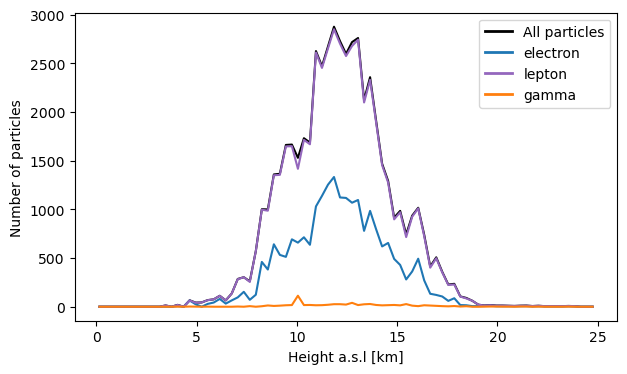

In [82]:
# Note: you can also highlight different particles with different colors 

color_dict = {
 "electron": "tab:blue",
'lepton':'tab:purple',
#  "muon + antimuon": "tab:green", # Note: the + combines all of these for the plot (multiple possible)
#  'hadron': 'tab:red',
'gamma':'tab:orange'
}

ax = CP.plot_particle_height_distribution(
    color_dict = color_dict,
    height_steps= 0.3
)
